#**ICC** CRICKET MEN'S WORLD_CUP 2023 STATISTICS PREDICTION  

#FIRSTLY I HAVE TRIED PREDICTING THE HIGHEST(TOP - 3 SCORERS) in ICC MEN'S CRICKET WORLD CUP 2023

### FOR THAT I HAVE TAKEN BATTING STATISTICS FOR THE LAST SEASON 2019 AND THEN TRAINED A MODEL ON THIS DATA ,WHICH EVENTUALLY I USED TO PREDICT THE RUNS OF THE COMMON PLAYERS IN 2023(i.e the players who played in both season)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_2019 = pd.read_csv('2019_stats.csv')
df_2023 = pd.read_csv('2023_stats.csv')

## ONLY SELECTING THE DATA FOR PLAYERS WHICH ARE COMMON FOR BOTH THE SEASONS 2019 && 2023


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


In [4]:
common_players = set(df_2019['Player']).intersection(df_2023['Player'])

In [5]:
df_2019 = df_2019[df_2019['Player'].isin(common_players)]

##HANDLING MISSING VALUES <br>
Replacing the string '-' with mean values from other instances

In [6]:
df_2019.replace('-', 0, inplace=True)
df_2023.replace('-',0,inplace=True)

##PREPROCESSING THE DATA

HS coloumn is HIGHEST SCORE COLUMN and now removeany non-numeric attribute int the cell . Also finally convert the data type to numeric from string

In [7]:
df_2019['HS'] = df_2019['HS'].str.replace(r'\D', '')

# Convert the column to numeric type
df_2019['HS'] = pd.to_numeric(df_2019['HS'], errors='coerce', downcast='integer')


<ipython-input-7-245d338a69fa>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2019['HS'] = df_2019['HS'].str.replace(r'\D', '')


The input features used in the linear regression model for prediction are:

1. **Ave (Batting Average):**
   - Definition: The average number of runs a batsman scores per dismissal (total runs divided by the number of times dismissed).
   - Significance: Indicates the batsman's overall performance and consistency in scoring runs.

2. **HS (Highest Score):**
   - Definition: The highest number of runs scored by the batsman in a single inning.
   - Significance: Reflects the batsman's ability to make high scores in individual innings.

3. **100 (Centuries):**
   - Definition: The number of centuries (100 or more runs in a single inning) scored by the batsman.
   - Significance: Indicates the batsman's ability to convert innings into substantial scores.

4. **50 (Half-Centuries):**
   - Definition: The number of half-centuries (50 to 99 runs in a single inning) scored by the batsman.
   - Significance: Shows the batsman's ability to consistently make decent scores.

5. **0 (Ducks):**
   - Definition: The number of times the batsman scored zero runs and got out in an inning.
   - Significance: Reflects the batsman's vulnerability and ability to get out without contributing to the score.

6. **4s (Fours):**
   - Definition: The total number of boundaries hit by the batsman (typically, shots that reach or cross the boundary without bouncing).
   - Significance: Reflects the batsman's ability to find gaps in the field and score runs with boundaries.

7. **6s (Sixes):**
   - Definition: The total number of sixes hit by the batsman (shots that clear the boundary without bouncing).
   - Significance: Reflects the batsman's ability to score runs with powerful shots.

These features collectively provide a quantitative representation of a batsman's performance, capturing aspects such as consistency, ability to make high scores, conversion rate of starts into substantial innings, and the ability to score runs through boundaries. The linear regression model leverages these features to predict the number of runs a batsman might score in a given season.

In [8]:
features = ['Ave', 'HS', '100', '50', '0', '4s', '6s']
target_variable = 'Runs'

In [9]:
X_train = df_2019[features]
y_train = df_2019[target_variable]

In [10]:
X_train

,Ave,HS,100,50,0,4s,6s
0,81.00,140,5,1,0,67,14
1,71.88,166,3,3,0,66,8
2,86.57,124,2,5,0,60,2
3,82.57,148,2,2,0,50,3
4,61.77,107,2,3,0,48,2
...,...,...,...,...,...,...,...
141,1.00,1,0,0,0,0,0
142,0,1,0,0,0,0,0
143,0,1,0,0,0,0,0
145,0,1,0,0,0,0,0


In [11]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
df_2023 = df_2023[df_2023['Player'].isin(common_players)]

In [13]:
df_2023['HS'] = df_2023['HS'].str.replace(r'\D', '')

# Convert the column to numeric type
df_2023['HS'] = pd.to_numeric(df_2023['HS'], errors='coerce', downcast='integer')


<ipython-input-13-7bae586d8e5a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2023['HS'] = df_2023['HS'].str.replace(r'\D', '')


In [14]:
# Extract relevant columns for prediction
features = ['Ave', 'HS', '100', '50', '0', '4s', '6s']
X_2023 = df_2023[features].astype(float)

In [15]:
X_2023


,Ave,HS,100,50,0,4s,6s
0,99.00,103.0,2.0,5.0,1.0,55.0,7.0
1,65.66,174.0,4.0,0.0,0.0,57.0,21.0
3,55.88,131.0,1.0,3.0,1.0,58.0,24.0
4,55.44,163.0,2.0,2.0,0.0,48.0,20.0
5,55.25,133.0,2.0,2.0,0.0,39.0,8.0
...,...,...,...,...,...,...,...
131,7.00,7.0,0.0,0.0,0.0,1.0,0.0
132,3.50,5.0,0.0,0.0,0.0,0.0,0.0
139,2.00,2.0,0.0,0.0,0.0,0.0,0.0
142,1.00,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Make predictions
predictions_2023 = model.predict(X_2023)

# Add the predictions back to df_2023
df_2023['Predicted_Runs'] = predictions_2023

In [17]:
# Display the predictions for all players in 2023
print("Predicted Runs for All Players in 2023:")
print(df_2023[['Player', 'Predicted_Runs']])

Predicted Runs for All Players in 2023:
                      Player  Predicted_Runs
0              V Kohli (IND)      588.761750
1             Q de Kock (SA)      610.279828
3            RG Sharma (IND)      577.098593
4            DA Warner (AUS)      549.484579
5     HE van der Dussen (SA)      451.110952
..                       ...             ...
131          TG Southee (NZ)       23.649419
132  Najibullah Zadran (AFG)       15.436455
139     Mohammed Shami (IND)       12.365408
142         LH Ferguson (NZ)       11.116839
143           AT Carey (AUS)        2.597175

[63 rows x 2 columns]


### Converting the predicted runs to nearest integer

In [18]:
df_2023['Predicted_Runs'] = df_2023['Predicted_Runs'].round().astype(int)

In [19]:
print(df_2023[['Player', 'Predicted_Runs']])

                      Player  Predicted_Runs
0              V Kohli (IND)             589
1             Q de Kock (SA)             610
3            RG Sharma (IND)             577
4            DA Warner (AUS)             549
5     HE van der Dussen (SA)             451
..                       ...             ...
131          TG Southee (NZ)              24
132  Najibullah Zadran (AFG)              15
139     Mohammed Shami (IND)              12
142         LH Ferguson (NZ)              11
143           AT Carey (AUS)               3

[63 rows x 2 columns]


###NOW CHECKING THE ACCURACY OF THE MODEL BY COMPARING THE DATA

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'Actual_Runs' column in df_2023 contains the actual runs made in 2023
actual_runs_2023 = df_2023['Runs']

# Assuming 'Predicted_Runs' column in df_2023 contains the predicted runs for 2023
predicted_runs_2023 = df_2023['Predicted_Runs']

# Calculate MAE, MSE, and R-squared
mae = mean_absolute_error(actual_runs_2023, predicted_runs_2023)
mse = mean_squared_error(actual_runs_2023, predicted_runs_2023)
r2 = r2_score(actual_runs_2023, predicted_runs_2023)

# Display the accuracy metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 23.555555555555557
Mean Squared Error (MSE): 1187.3968253968253
R-squared (R2): 0.9497667588352741


##CONCLUSION OF THE ANALYSIS OF THE ERROR PERFORMED ABOVE

### In this case, the R-squared value is quite high, suggesting that the model is performing well in explaining the variance in the runs data. The MAE and MSE values are relatively low, further indicating good accuracy, but the interpretation may depend on the specific context of your application.

In [21]:
##Display the top three highest runs scorers in 2023
top_scorers_2023 = df_2023.sort_values(by='Predicted_Runs', ascending=False).head(3)
print("Top Three Highest Run Scorers in 2023:")
print(top_scorers_2023[['Player', 'Predicted_Runs']])

Top Three Highest Run Scorers in 2023:
            Player  Predicted_Runs
1   Q de Kock (SA)             610
0    V Kohli (IND)             589
3  RG Sharma (IND)             577


##THESE TOP 3 PREDICTIONS MATCH WITH THE TILL DATE STATS OF WORLD CUP 2023

#NOW PREDICTING THE WINNER OF WORLD CUP 2023 FROM THE PAST PERFOMANCES OF TEAMS IN WORLD CUP

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##BASIC DATA EXPLORATION

In [35]:
data = pd.read_csv('World_cup_2023.csv')
fixtures = pd.read_csv('Fixtures.csv')
results = pd.read_csv('results.csv')

##This dataset presents statistical information for all the teams taking part in the 2023 ODI World Cup.


In [36]:
data

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
0,Australia,1,5,60.73,94,69,73.40,23,24.46,1,1,Yes,2714,118
1,Pakistan,2,1,52.78,79,45,56.96,32,40.50,0,2,Yes,2316,116
2,India,3,2,52.38,84,53,63.09,29,34.52,1,1,Yes,3807,115
3,New Zealand,4,0,45.89,89,54,60.67,33,37.07,1,1,No,2806,104
4,England,5,1,50.32,83,48,57.83,32,38.55,2,1,Yes,2426,101
5,South Africa,6,0,61.00,64,38,59.37,23,35.93,2,1,No,1910,101
6,Bangladesh,7,0,36.65,40,14,35.00,25,62.50,0,1,No,2451,98
7,Afghanistan,8,0,49.65,15,1,6.66,14,93.33,0,0,No,1361,91
8,Sri Lanka,9,1,45.74,80,38,47.50,39,48.75,1,2,Yes,2794,87
9,Netherlands,10,0,34.21,20,2,10.00,18,90.00,0,0,No,1044,37


Team_name: The name of the cricket team.<br>
Team_ranking: The ranking of the team.<br>
Titles: The number of titles won by the team.<br>
Win_percentage_ODI: Win percentage in One Day Internationals (ODI) matches.<br>
WC_matches: Total number of World Cup matches played.<br>
WC_match_won: Number of World Cup matches won.<br>
Win_percent_WC: Win percentage in World Cup matches.<br>
WC_match_loss: Number of World Cup matches lost.<br>
Loss_percent_WC: Loss percentage in World Cup matches.<br>
Tied: Number of matches tied.<br>
No_result: Number of matches with no result.<br>
World_cup_winner: Indicates whether the team is a World Cup winner.<br>
Recent_points: Recent points earned by the team.
Rating: Rating of the team.<br>

<br><br>
This dataset provides a snapshot of various performance metrics for cricket teams, including their historical rankings, win percentages in ODIs and World Cup matches, titles won, and recent points. The presence of the "World_cup_winner" column suggests that the dataset could be used for predicting World Cup outcomes, such as identifying finalists or winners based on historical team performance.



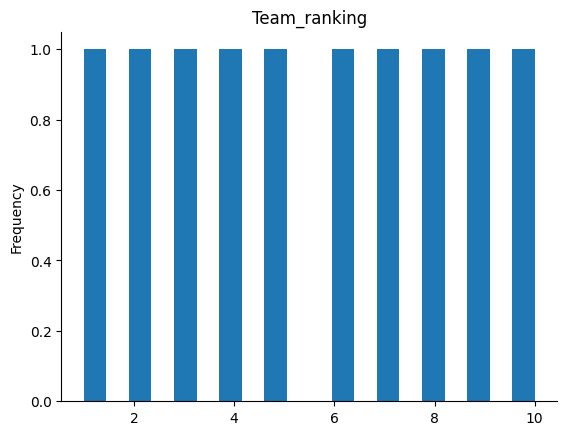

In [37]:
from matplotlib import pyplot as plt
data['Team_ranking'].plot(kind='hist', bins=20, title='Team_ranking')
plt.gca().spines[['top', 'right',]].set_visible(False)

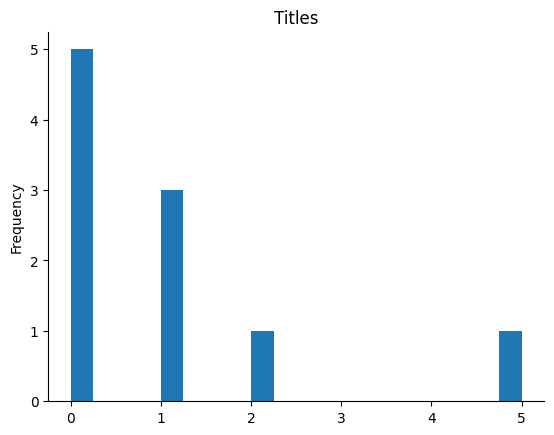

In [38]:
from matplotlib import pyplot as plt
data['Titles'].plot(kind='hist', bins=20, title='Titles')
plt.gca().spines[['top', 'right',]].set_visible(False)

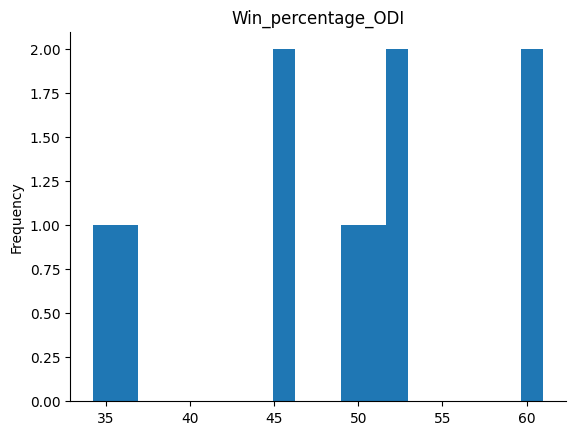

In [39]:
from matplotlib import pyplot as plt
data['Win_percentage_ODI'].plot(kind='hist', bins=20, title='Win_percentage_ODI')
plt.gca().spines[['top', 'right',]].set_visible(False)

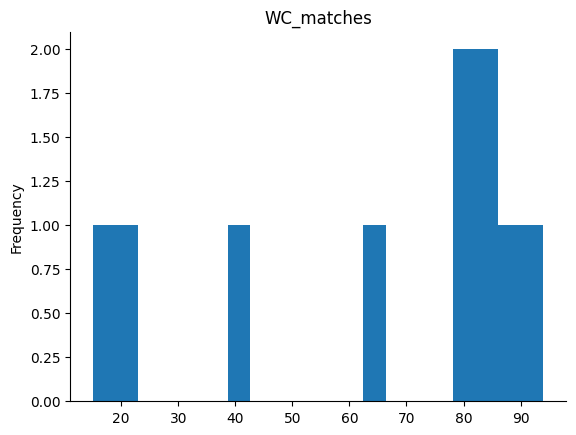

In [40]:
from matplotlib import pyplot as plt
data['WC_matches'].plot(kind='hist', bins=20, title='WC_matches')
plt.gca().spines[['top', 'right',]].set_visible(False)

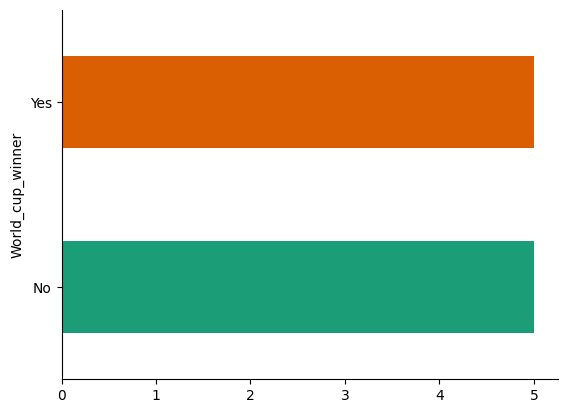

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('World_cup_winner').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

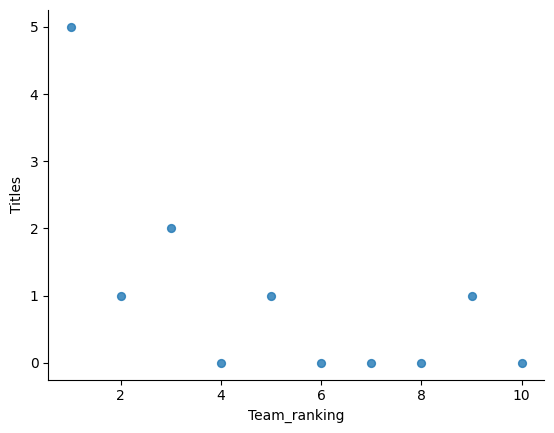

In [42]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Team_ranking', y='Titles', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

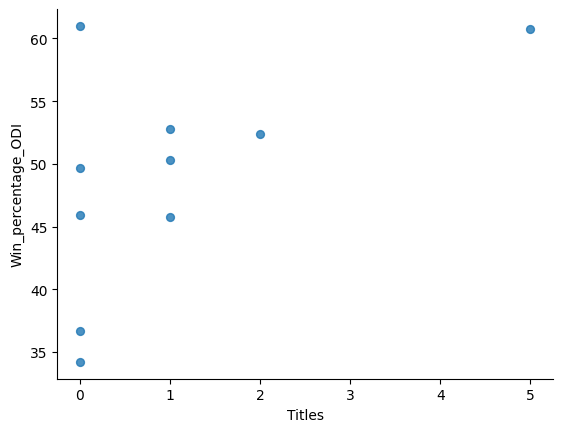

In [43]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Titles', y='Win_percentage_ODI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

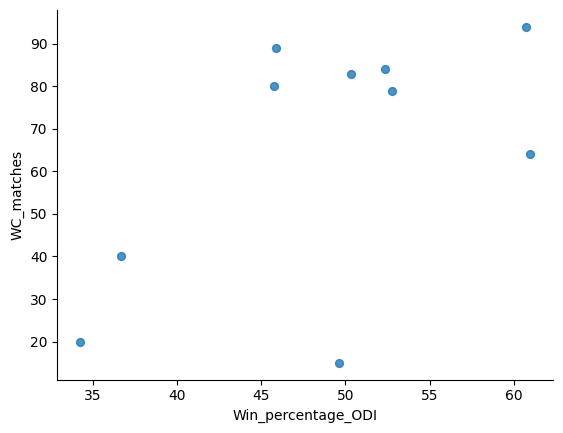

In [44]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Win_percentage_ODI', y='WC_matches', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

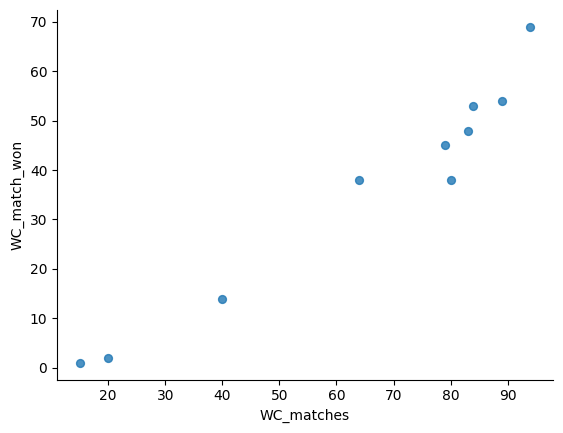

In [45]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='WC_matches', y='WC_match_won', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

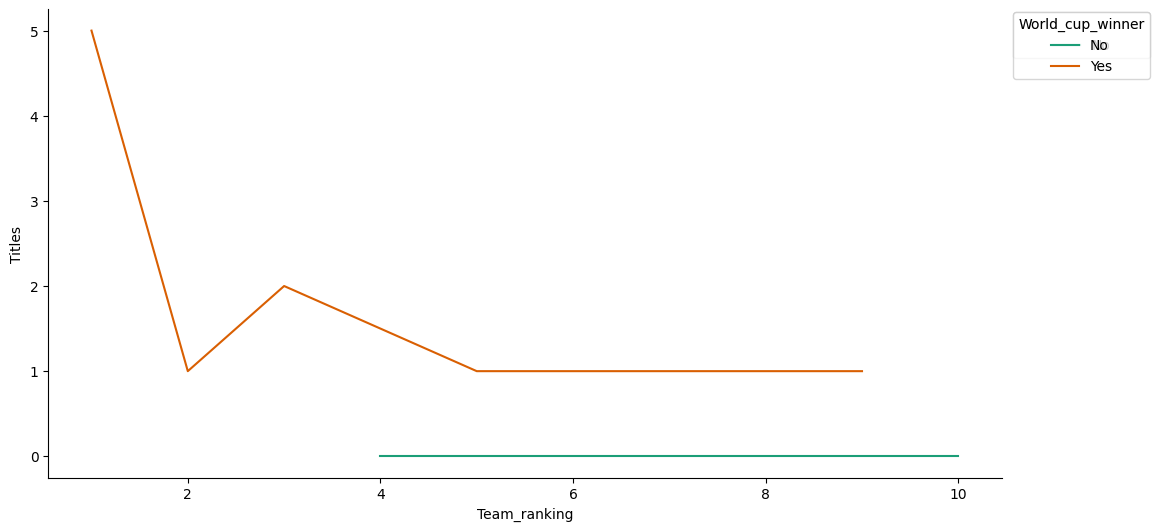

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Team_ranking']
  ys = series['Titles']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Team_ranking', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('World_cup_winner')):
  _plot_series(series, series_name, i)
  fig.legend(title='World_cup_winner', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Team_ranking')
_ = plt.ylabel('Titles')

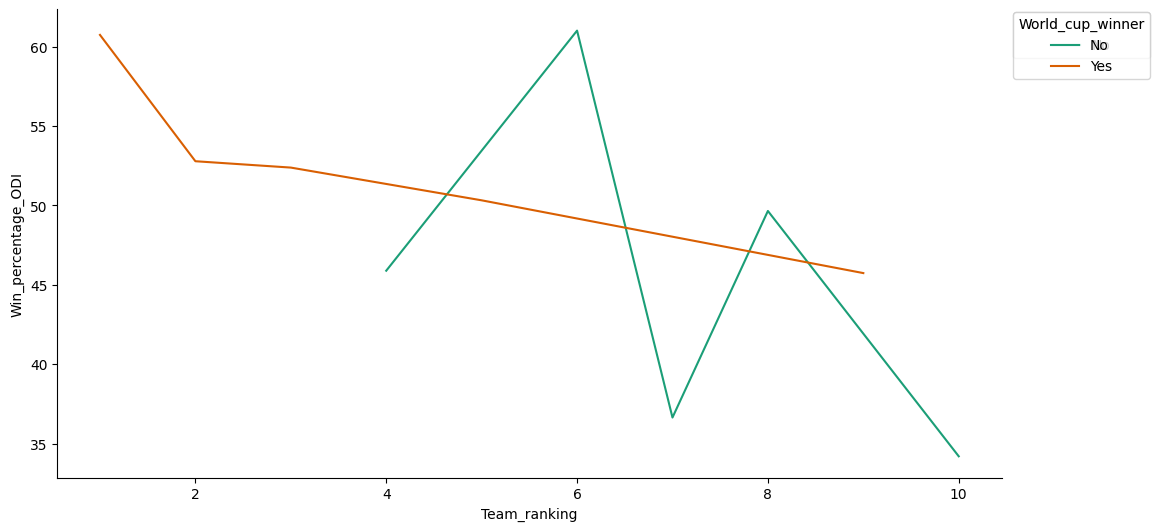

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Team_ranking']
  ys = series['Win_percentage_ODI']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Team_ranking', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('World_cup_winner')):
  _plot_series(series, series_name, i)
  fig.legend(title='World_cup_winner', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Team_ranking')
_ = plt.ylabel('Win_percentage_ODI')

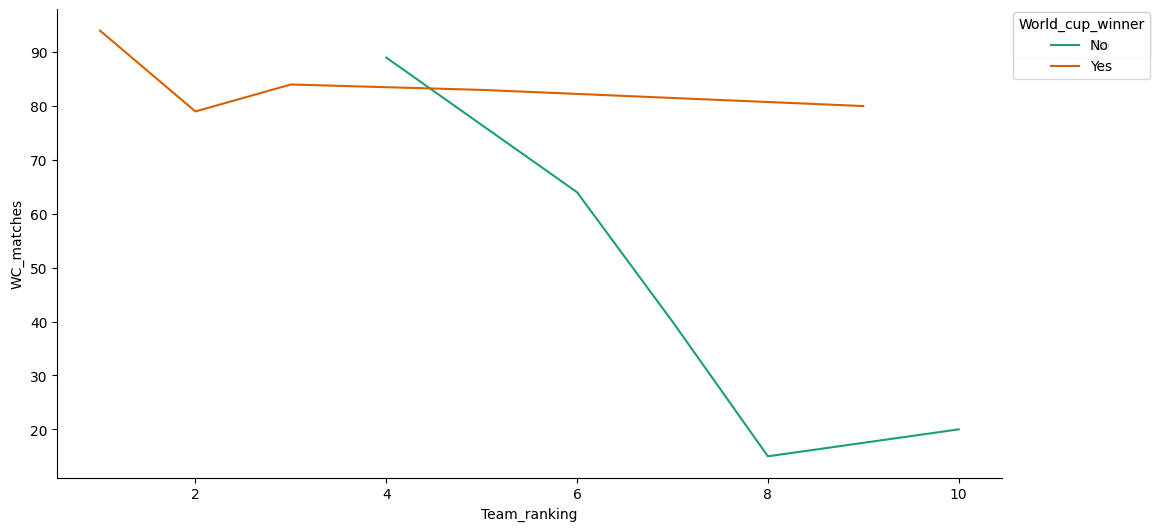

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Team_ranking']
  ys = series['WC_matches']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Team_ranking', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('World_cup_winner')):
  _plot_series(series, series_name, i)
  fig.legend(title='World_cup_winner', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Team_ranking')
_ = plt.ylabel('WC_matches')

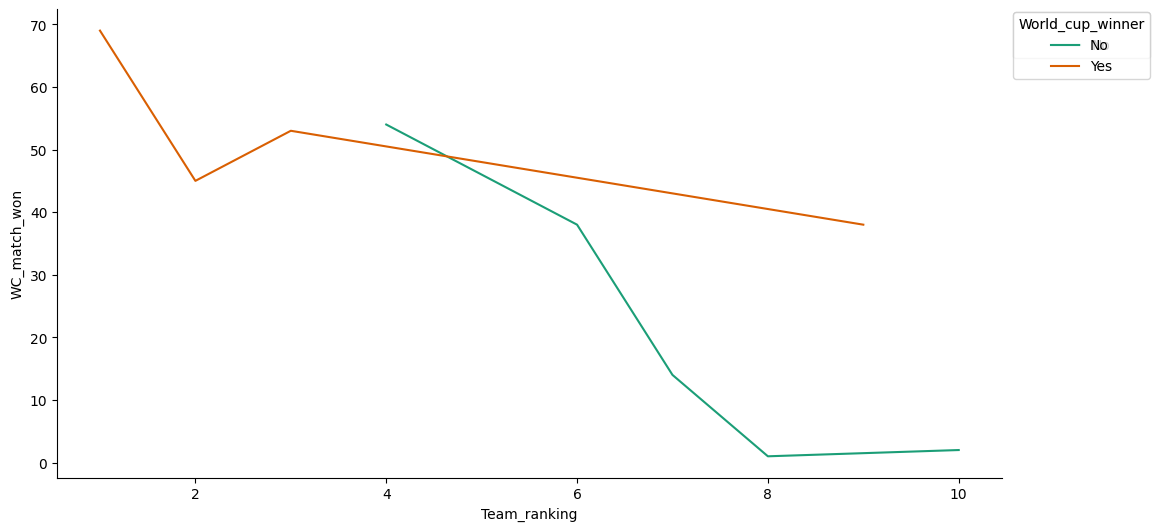

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Team_ranking']
  ys = series['WC_match_won']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Team_ranking', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('World_cup_winner')):
  _plot_series(series, series_name, i)
  fig.legend(title='World_cup_winner', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Team_ranking')
_ = plt.ylabel('WC_match_won')

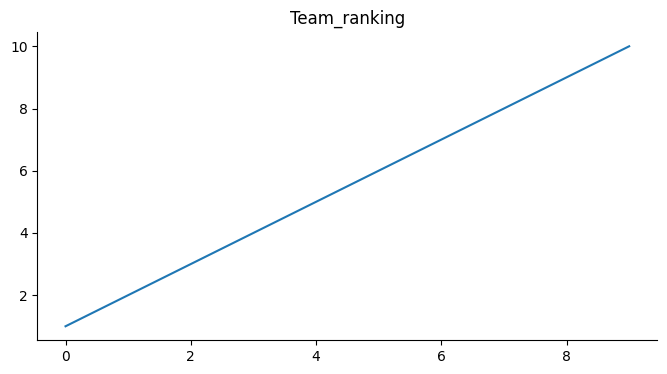

In [50]:
from matplotlib import pyplot as plt
data['Team_ranking'].plot(kind='line', figsize=(8, 4), title='Team_ranking')
plt.gca().spines[['top', 'right']].set_visible(False)

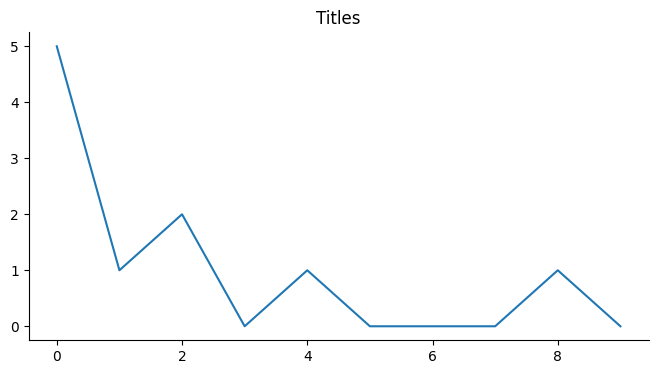

In [51]:
from matplotlib import pyplot as plt
data['Titles'].plot(kind='line', figsize=(8, 4), title='Titles')
plt.gca().spines[['top', 'right']].set_visible(False)

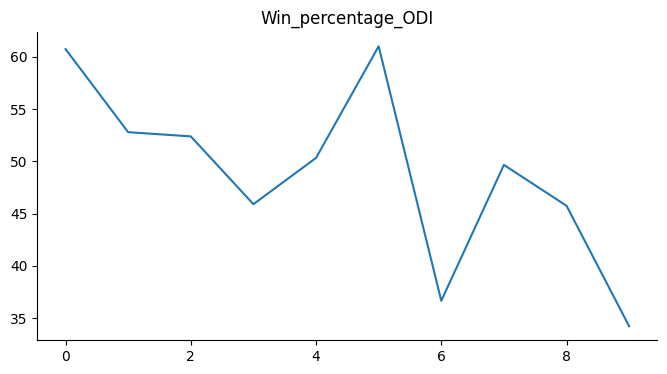

In [52]:
from matplotlib import pyplot as plt
data['Win_percentage_ODI'].plot(kind='line', figsize=(8, 4), title='Win_percentage_ODI')
plt.gca().spines[['top', 'right']].set_visible(False)

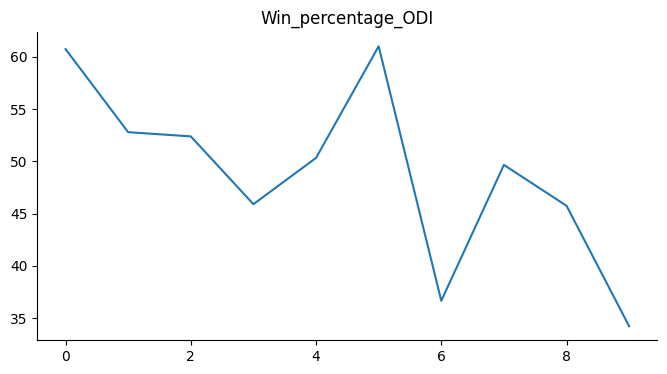

In [53]:
from matplotlib import pyplot as plt
data['Win_percentage_ODI'].plot(kind='line', figsize=(8, 4), title='Win_percentage_ODI')
plt.gca().spines[['top', 'right']].set_visible(False)

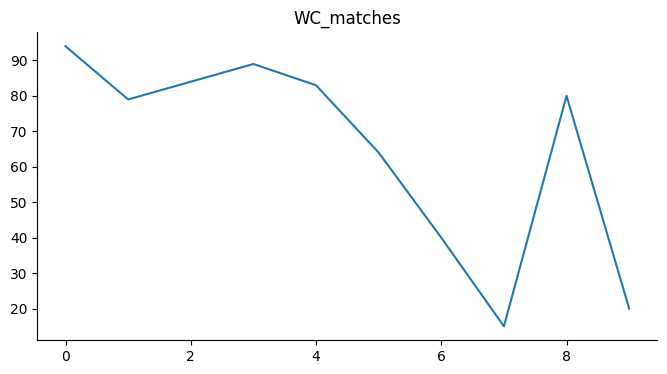

In [54]:
from matplotlib import pyplot as plt
data['WC_matches'].plot(kind='line', figsize=(8, 4), title='WC_matches')
plt.gca().spines[['top', 'right']].set_visible(False)

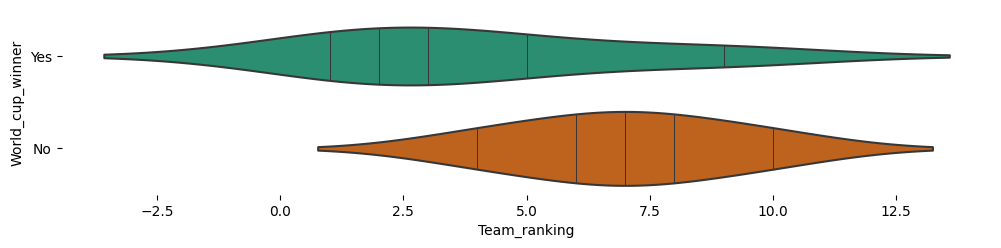

In [55]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['World_cup_winner'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Team_ranking', y='World_cup_winner', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

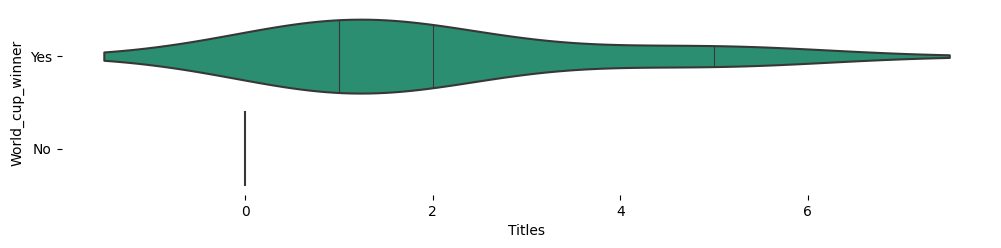

In [56]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['World_cup_winner'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Titles', y='World_cup_winner', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

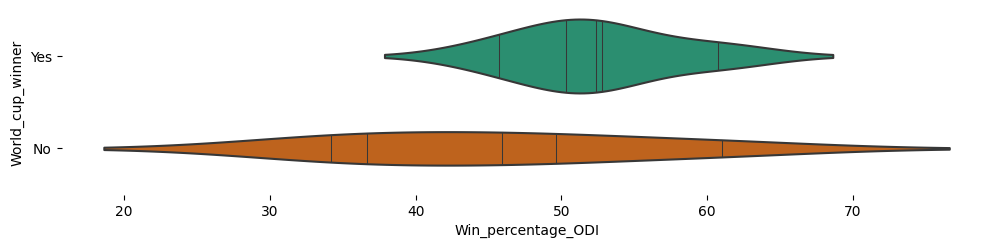

In [57]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['World_cup_winner'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Win_percentage_ODI', y='World_cup_winner', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

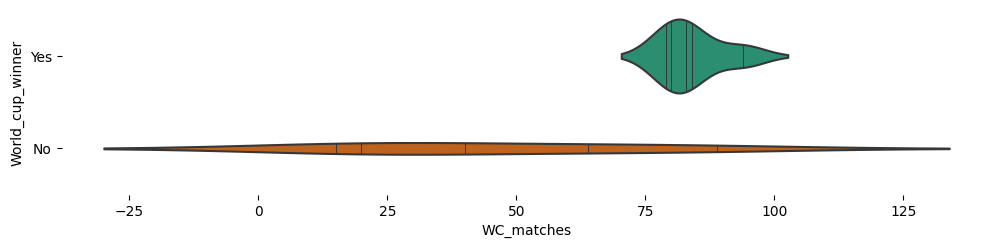

In [58]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['World_cup_winner'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='WC_matches', y='World_cup_winner', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Using the past performance as an indicator for future performance

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team_name           10 non-null     object 
 1   Team_ranking        10 non-null     int64  
 2   Titles              10 non-null     int64  
 3   Win_percentage_ODI  10 non-null     float64
 4   WC_matches          10 non-null     int64  
 5   WC_match_won        10 non-null     int64  
 6   Win_percent_WC      10 non-null     float64
 7   WC_match_loss       10 non-null     int64  
 8   Loss_percent_WC     10 non-null     float64
 9   Tied                10 non-null     int64  
 10  No_result           10 non-null     int64  
 11  World_cup_winner    10 non-null     object 
 12  Recent_points       10 non-null     int64  
 13  Rating              10 non-null     int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.2+ KB


## EXPLORATORY DATA ANALYSIS

### 1)Titles won by each team

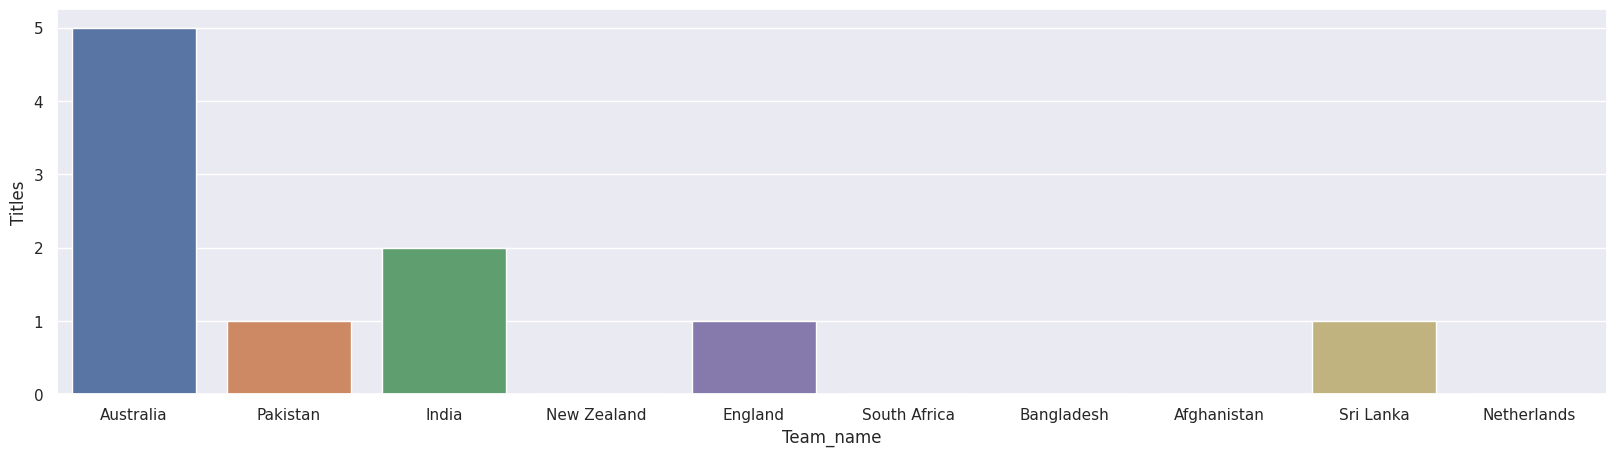

In [60]:
# Set the figure size using sns.set
sns.set(rc={'figure.figsize':(20, 5)})

# Create a bar plot using sns.barplot to visualize team titles
sns.barplot(x='Team_name', y='Titles', data=data)

# Display the plot
plt.show()

### 1)Win percentage in ODI by each team

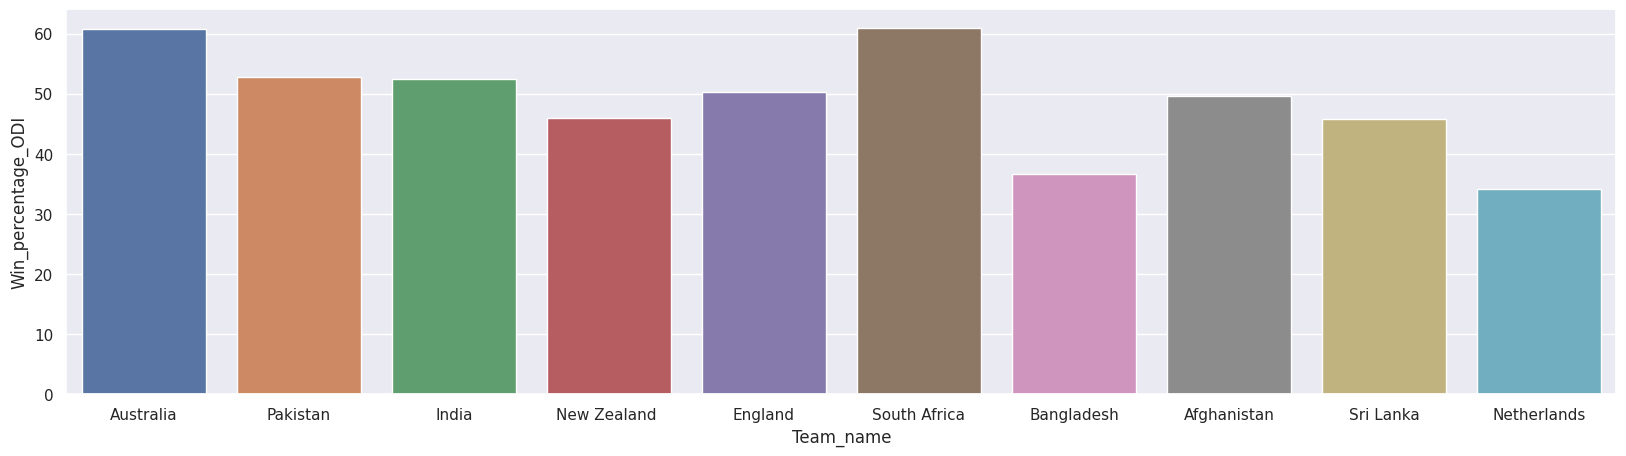

In [61]:
# Set the figure size for the bar plot using Seaborn
sns.set(rc={'figure.figsize':(20, 5)})

# Create a bar plot using Seaborn
sns.barplot(x='Team_name', y='Win_percentage_ODI', data=data)

# Display the plot
plt.show()

### Recent ICC ODI rating¶


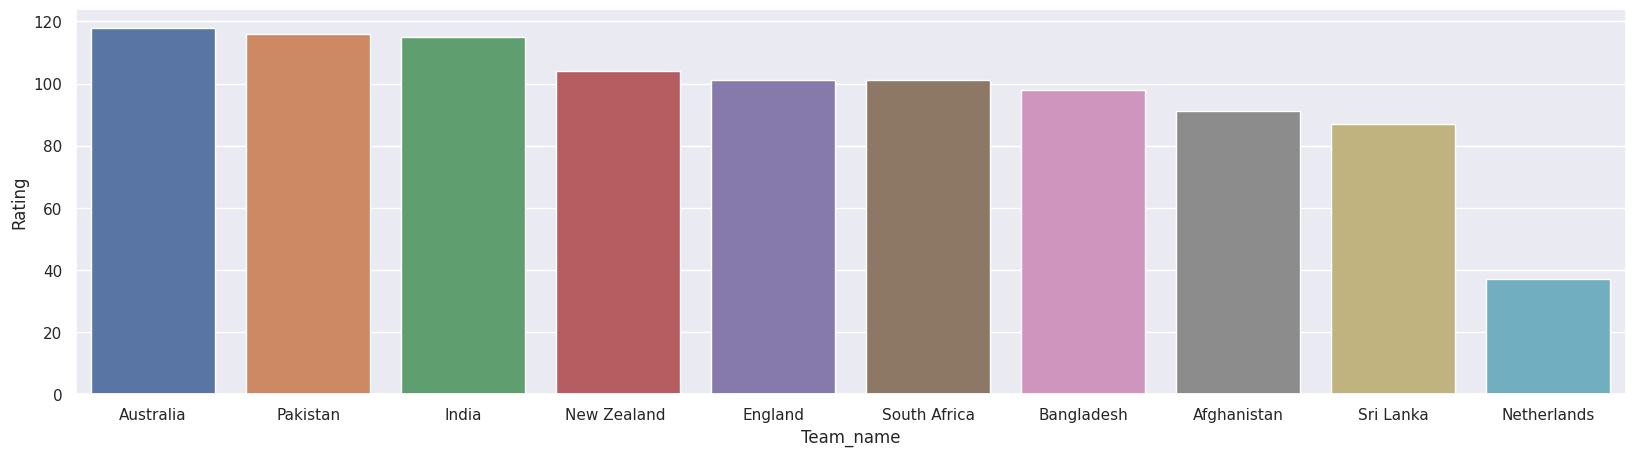

In [62]:
# Set the figure size for the bar plot using Seaborn
sns.set(rc={'figure.figsize':(20, 5)})

# Create a bar plot using Seaborn to display recent ratings of teams
sns.barplot(x='Team_name', y='Rating', data=data)

# Display the plot
plt.show()

In [63]:
results.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
3,08/05/2015,Ireland,England,No result,No result,The Village
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium


In [64]:
# Removing rows with 'Match abandoned' and 'No result' from the 'results' DataFrame."
results.drop(results[(results['Winner'] == 'Match abandoned' )].index, inplace=True)
results.drop(results[(results['Winner'] == 'No result' )].index, inplace=True)

In [65]:
results['Winner'].unique()

array(['Bangladesh ', 'Pakistan ', 'England ', 'New Zealand ', 'England',
       'India', 'South Africa', 'Pakistan', 'Sri Lanka ', 'Bangladesh',
       'Sri Lanka', 'Zimbabwe ', 'New Zealand', 'Australia ', 'Australia',
       'Zimbabwe', 'India ', 'Afghanistan ', 'Afghanistan', 'West Indies',
       'Match Tied', 'Ireland', 'South Africa ', 'Ireland ',
       'West Indies ', 'Scotland', 'Netherlands', 'Nepal', 'Netherlands '],
      dtype=object)

In [66]:
results['Winner'] = results['Winner'].str.rstrip()
results['Winner'].value_counts()

India           95
England         83
New Zealand     69
South Africa    66
Bangladesh      63
Australia       63
Pakistan        58
Sri Lanka       52
Afghanistan     48
West Indies     27
Zimbabwe        20
Ireland         13
Netherlands     10
Match Tied       4
Scotland         3
Nepal            1
Name: Winner, dtype: int64

### Stats of Indian team¶


In [67]:
# Filter the 'results' DataFrame to include rows where India played either as Team_1 or Team_2
df = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]

# Create a new DataFrame 'India' containing all rows from the filtered DataFrame
India = df.iloc[:]

# Display the first few rows of the 'India' DataFrame
India.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
11,18/06/2015,Bangladesh,India,Bangladesh,won by 79 runs,Shere Bangla National Stadium
13,21/06/2015,Bangladesh,India,Bangladesh,won by 6 wickets,Shere Bangla National Stadium
14,24/06/2015,Bangladesh,India,India,won by 77 runs,Shere Bangla National Stadium
16,10/07/2015,Zimbabwe,India,India,won by 4 runs,Harare Sports Club
19,12/07/2015,Zimbabwe,India,India,won by 62 runs,Harare Sports Club


In [68]:
India_win = India[India['Winner']=='India']

In [69]:
India_win

,Date,Team_1,Team_2,Winner,Margin,Ground
14,24/06/2015,Bangladesh,India,India,won by 77 runs,Shere Bangla National Stadium
16,10/07/2015,Zimbabwe,India,India,won by 4 runs,Harare Sports Club
19,12/07/2015,Zimbabwe,India,India,won by 62 runs,Harare Sports Club
20,14/07/2015,Zimbabwe,India,India,won by 83 runs,Harare Sports Club
73,23/01/2016,Australia,India,India,won by 6 wickets,Sydney Cricket Ground
...,...,...,...,...,...,...
672,15/01/2023,India,Sri Lanka,India,won by 317 runs,Greenfield International Stadium
673,18/01/2023,India,New Zealand,India,won by 12 runs,Rajiv Gandhi International Stadium
674,21/01/2023,India,New Zealand,India,won by 8 wickets,Shaheed Veer Narayan Sing International Stadium
675,24/01/2023,India,New Zealand,India,won by 90 runs,Holkar Cricket Stadium


In [70]:
73/106

0.6886792452830188

### No.of wins in ODIs against other teams¶

In [71]:
india_won_matches = India_win[(India_win['Team_1'] == 'India') | (India_win['Team_2'] == 'India')]

india_won_matches['opponent'] = np.where(india_won_matches['Team_1'] == 'India', india_won_matches['Team_2'], india_won_matches['Team_1'])

In [72]:
india_won_matches['opponent'].unique()

array(['Bangladesh ', 'Zimbabwe ', 'Australia ', 'Zimbabwe',
       'New Zealand', ' England', 'Bangladesh', 'West Indies ',
       'West Indies', 'Sri Lanka ', 'Sri Lanka', 'Australia',
       'South Africa ', 'England ', 'Hong Kong ', 'New Zealand ',
       'Afghanistan', 'England', 'South Africa'], dtype=object)

###As you can see in the unique values of opponents 'England' is repeating two times . So we need to remove this discrepancy in the data

In [73]:
india_won_matches['opponent'].str.rstrip().str.lstrip().unique()

array(['Bangladesh', 'Zimbabwe', 'Australia', 'New Zealand', 'England',
       'West Indies', 'Sri Lanka', 'South Africa', 'Hong Kong',
       'Afghanistan'], dtype=object)

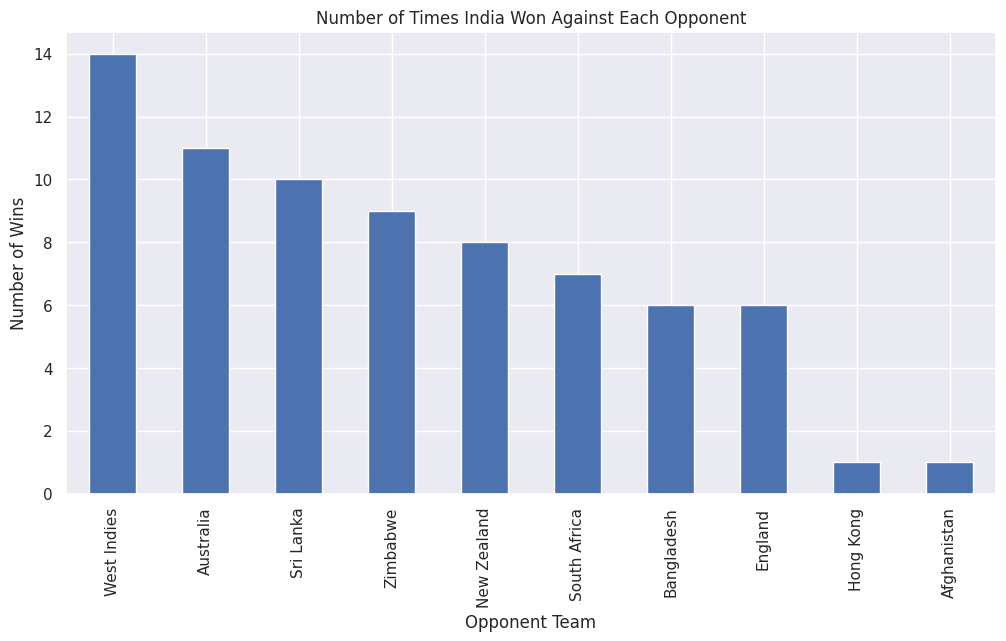

In [74]:
opponent_count = india_won_matches['opponent'].str.rstrip().str.lstrip().value_counts()

plt.figure(figsize=(12,6))
opponent_count.plot(kind='bar')
plt.title("Number of Times India Won Against Each Opponent")
plt.xlabel("Opponent Team")
plt.ylabel("Number of Wins")
plt.show()

# Preprocessing data

#AFTER DATA ANALYSIS WE WILL DO DATA PREPROCESSING

Data Preprocessing:<br>
Whitespace Removal:

The rem_whitespace function is defined to strip whitespace from the team names in the 'Team_name' column.
The apply function is used to remove leading and trailing whitespaces from team names in the 'Team_name' column.

Filtering Teams for World Cup 2023:

Two separate dataframes (df_team_1 and df_team_2) are created by filtering the 'results' dataframe based on whether 'Team_1' or 'Team_2' is in the list of 'worldcup_teams' (teams participating in the 2023 World Cup).
These dataframes are then concatenated into a single dataframe called 'teams'.
Duplicate rows are checked and dropped.

Handling Null Values:

Null values in the 'teams' dataframe are checked using isnull().sum().
No null values are present in this dataset.

Mapping Home Countries:

A dictionary (home_country_mapping) is created to map cricket grounds to their respective home countries.
A new column 'home_1' is created, indicating whether the 'Ground' is the home ground for 'Team_1'.
A similar column 'home_2' is created for 'Team_2'.

Drop Unnecessary Columns:

Columns such as 'Margin' are dropped from the 'teams' dataframe.

Winner Column Update:

The 'Winner' column is updated based on the comparison between 'Team_1' and 'Team_2'.

Date Column Removal:

The 'Date' column is dropped from the 'teams' dataframe.

Merging Data:

The function modify_data is defined to merge the 'teams' dataframe with the 'data' dataframe for both 'Team_1' and 'Team_2'.
The resulting dataframes (merged_data1 and merged_data2) are then concatenated.

Column Renaming:

Column names are modified to avoid conflicts when merging the data for 'Team_1' and 'Team_2'.

Handling Null Values in Merged Data:

Null values in the merged dataframe are checked and filled with 0.

Winner Column Encoding:

The 'Winner' column is encoded with 0 for 'Team_1' and 1 for 'Team_2'.

Train-Test Split:

The dataset is split into training and testing sets using train_test_split.

Standard Scaling:

The features are standardized using StandardScaler.

In [75]:
import re

def rem_whitespace(str):
  return str.strip();

In [76]:
data['Team _name'] = data['Team_name'].apply(lambda x: rem_whitespace(x))

In [77]:
results['Team_1'] = results['Team_1'].apply(lambda x: rem_whitespace(x))

In [78]:
results['Team_2'] = results['Team_2'].apply(lambda x: rem_whitespace(x))

In [79]:
worldcup_teams = ['England','South Africa','Netherlands','Pakistan','New Zealand','Sri Lanka','Afghanistan','Australia','Bangladesh','India']

In [80]:
df_team_1 = results[results['Team_1'].isin(worldcup_teams)]
df_team_2 = results[results['Team_2'].isin(worldcup_teams)]
teams = pd.concat((df_team_1, df_team_2))

In [81]:
print(teams.duplicated().value_counts())
teams.drop_duplicates(inplace = True)
print(len(teams))

False    671
True     411
dtype: int64
671


In [82]:
teams.isnull().sum()

Date      0
Team_1    0
Team_2    0
Winner    0
Margin    0
Ground    0
dtype: int64

In [83]:
teams.isnull().sum()

Date      0
Team_1    0
Team_2    0
Winner    0
Margin    0
Ground    0
dtype: int64

In [84]:
teams

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium
5,29/05/2015,Pakistan,Zimbabwe,Pakistan,won by 6 wickets,Gaddafi Stadium
...,...,...,...,...,...,...
705,14/05/2023,Ireland,Bangladesh,Bangladesh,won by 5 runs,County Ground (Chelmsford)
710,23/06/2023,Oman,Sri Lanka,Sri Lanka,won by 10 wickets,Queens Sports Club
711,24/06/2023,Nepal,Netherlands,Netherlands,won by 7 wickets,Takashinga Sports Club
712,25/06/2023,Ireland,Sri Lanka,Sri Lanka,won by 133 runs,Queens Sports Club


In [85]:
teams['Ground'].unique()

array(['Shere Bangla National Stadium', 'Gaddafi Stadium', 'Edgbaston',
       'Kennington Oval', 'The Rose Bowl', 'Trent Bridge',
       'Riverside Ground', 'Rangiri Dambulla International Stadium',
       'Pallekele International Cricket Stadium',
       'Zahur Ahmed Chowdhury Stadium', 'R Premadasa Stadium',
       'Mahinda Rajapaksha International Cricket Stadium',
       'SuperSport Park', 'Senwes Park', 'Kingsmead', "Lord's",
       'Old Trafford', 'Headingley', 'Holkar Cricket Stadium',
       'Saurashtra Cricket Association Stadium', 'MA Chidambaram Stadium',
       'Wankhede Stadium', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Hagley Oval', 'Saxton Oval', 'Bay Oval', 'WACA Ground',
       'Brisbane Cricket Ground', 'Manuka Oval', 'Sydney Cricket Ground',
       'Basin Reserve', 'Eden Park', 'Mangaung Oval', 'Sky Stadium',
       "St George's Park", 'Seddon Park', 'Wanderers Stadium', 'Newlands',
       'Providence S

In [86]:
home_country_mapping = {
    'Shere Bangla National Stadium': 'Bangladesh',
    'Gaddafi Stadium': 'Pakistan',
    'Edgbaston': 'England',
    'Kennington Oval': 'England',
    'The Rose Bowl': 'England',
    'Trent Bridge': 'England',
    'Riverside Ground': 'England',
    'Rangiri Dambulla International Stadium': 'Sri Lanka',
    'Pallekele International Cricket Stadium': 'Sri Lanka',
    'Zahur Ahmed Chowdhury Stadium': 'Bangladesh',
    'R Premadasa Stadium': 'Sri Lanka',
    'Mahinda Rajapaksha International Cricket Stadium': 'Sri Lanka',
    'SuperSport Park': 'South Africa',
    'Senwes Park': 'South Africa',
    'Kingsmead': 'South Africa',
    "Lord's": 'England',
    'Old Trafford': 'England',
    'Headingley': 'England',
    'Holkar Cricket Stadium': 'India',
    'Saurashtra Cricket Association Stadium': 'India',
    'MA Chidambaram Stadium': 'India',
    'Wankhede Stadium': 'India',
    'Sheikh Zayed Stadium': 'United Arab Emirates',
    'Sharjah Cricket Stadium': 'United Arab Emirates',
    'Dubai International Cricket Stadium': 'United Arab Emirates',
    'Hagley Oval': 'New Zealand',
    'Saxton Oval': 'New Zealand',
    'Bay Oval': 'New Zealand',
    'WACA Ground': 'Australia',
    'Brisbane Cricket Ground': 'Australia',
    'Manuka Oval': 'Australia',
    'Sydney Cricket Ground': 'Australia',
    'Basin Reserve': 'New Zealand',
    'Eden Park': 'New Zealand',
    'Mangaung Oval': 'South Africa',
    'Sky Stadium': 'New Zealand',
    "St George's Park": 'South Africa',
    'Seddon Park': 'New Zealand',
    'Wanderers Stadium': 'South Africa',
    'Newlands': 'South Africa',
    'Providence Stadium': 'Guyana',
    'Warner Park': 'Saint Kitts and Nevis',
    'Sophia Gardens': 'Wales',
    'Willowmoore Park': 'South Africa',
    'Himachal Pradesh Cricket Association Stadium': 'India',
    'Arun Jaitley Stadium': 'India',
    'Punjab Cricket Association IS Bindra Stadium': 'India',
    'JSCA International Stadium Complex': 'India',
    'Dr YS Rajasekhara Reddy Cricket Stadium': 'India',
    'Harare Sports Club': 'Zimbabwe',
    'Queens Sports Club': 'Zimbabwe',
    'Melbourne Cricket Ground': 'Australia',
    'Maharashtra Cricket Association Stadium': 'India',
    'Barabati Stadium': 'India',
    'Eden Gardens': 'India',
    'Adelaide Oval': 'Australia',
    'Greater Noida Sports Complex Ground': 'India',
    'Sinhalese Sports Club Ground': 'Sri Lanka',
    'County Ground (Bristol)': 'England',
    'Castle Avenue': 'Ireland',
    'Galle International Stadium': 'Sri Lanka',
    'M Chinnaswamy Stadium': 'India',
    'Vidarbha Cricket Association Stadium': 'India',
    'Diamond Oval': 'South Africa',
    'Boland Park': 'South Africa',
    'Buffalo Park': 'South Africa',
    'Green Park': 'India',
    'Cobham Oval (New)': 'New Zealand',
    'University Oval': 'New Zealand',
    'Perth Stadium': 'Australia',
    'Bulawayo Athletic Club': 'Zimbabwe',
    'Old Hararians Sports Club': 'Zimbabwe',
    'VRA Ground': 'Netherlands',
    'Barsapara Cricket Stadium': 'India',
    'Brabourne Stadium': 'India',
    'Greenfield International Stadium': 'India',
    'Bellerive Oval': 'Australia',
    'Sylhet Stadium': 'Bangladesh',
    'McLean Park': 'New Zealand',
    'Rajiv Gandhi International Stadium': 'India',
    'The Village': 'Ireland',
    'The Cooper Associates County Ground': 'England',
    'Sportspark Het Schootsveld': 'Netherlands',
    'National Stadium (Karachi)': 'Pakistan',
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium': 'India',
    'Rawalpindi Cricket Stadium': 'Pakistan',
    'Hazelaarweg': 'Netherlands',
    'Sportspark Maarschalkerweerd': 'Netherlands',
    'West End Park International Cricket Stadium': 'Qatar',
    'Narendra Modi Stadium': 'India',
    'Multan Cricket Stadium': 'Pakistan',
    'Riverway Stadium': 'Australia',
    "Cazaly's Stadium": 'Australia',
    'Shaheed Veer Narayan Sing International Stadium': 'India',
    'Civil Service Cricket Club': 'Ireland',
    'Kensington Oval': 'Barbados',
    'Grange Cricket Club': 'Scotland',
    'Sir Vivian Richards Stadium': 'Antigua and Barbuda',
    'Daren Sammy National Cricket Stadium': 'Saint Lucia',
    "Queen's Park Oval": 'Trinidad and Tobago',
    'Sabina Park': 'Jamaica',
    'National Cricket Stadium (Grenada)': 'Grenada',
    'Rajiv Gandhi International Cricket Stadium': 'India',
    'County Ground (Chelmsford)': 'England',
    'Takashinga Sports Club': 'Zimbabwe'
}


###-> Had tried creating two different columns
home_1 && home_2 which were binary
home_1 being 1 when Ground is home to Team_1 else 0
Similarly home_2 being 1 when the Ground is home to Team_2 else 0

In [87]:
teams

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium
5,29/05/2015,Pakistan,Zimbabwe,Pakistan,won by 6 wickets,Gaddafi Stadium
...,...,...,...,...,...,...
705,14/05/2023,Ireland,Bangladesh,Bangladesh,won by 5 runs,County Ground (Chelmsford)
710,23/06/2023,Oman,Sri Lanka,Sri Lanka,won by 10 wickets,Queens Sports Club
711,24/06/2023,Nepal,Netherlands,Netherlands,won by 7 wickets,Takashinga Sports Club
712,25/06/2023,Ireland,Sri Lanka,Sri Lanka,won by 133 runs,Queens Sports Club


In [88]:
print(teams.columns)

Index(['Date', 'Team_1', 'Team_2', 'Winner', 'Margin', 'Ground'], dtype='object')


In [89]:
teams

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium
5,29/05/2015,Pakistan,Zimbabwe,Pakistan,won by 6 wickets,Gaddafi Stadium
...,...,...,...,...,...,...
705,14/05/2023,Ireland,Bangladesh,Bangladesh,won by 5 runs,County Ground (Chelmsford)
710,23/06/2023,Oman,Sri Lanka,Sri Lanka,won by 10 wickets,Queens Sports Club
711,24/06/2023,Nepal,Netherlands,Netherlands,won by 7 wickets,Takashinga Sports Club
712,25/06/2023,Ireland,Sri Lanka,Sri Lanka,won by 133 runs,Queens Sports Club


In [90]:
teams = teams.drop(['Margin'],axis=1)

In [91]:
def update_winner(row):
  if str(row['Team_1'].lower().strip())==str(row['Winner'].lower().strip()):
    return 'Team_1'
  else :
    return 'Team_2'

In [92]:
teams['Winner'] = teams.apply(lambda x: update_winner(x),axis=1)

In [93]:
teams = teams.drop(['Date'],axis=1)

In [94]:
teams

,Team_1,Team_2,Winner,Ground
0,Bangladesh,Pakistan,Team_1,Shere Bangla National Stadium
1,Bangladesh,Pakistan,Team_1,Shere Bangla National Stadium
2,Bangladesh,Pakistan,Team_1,Shere Bangla National Stadium
4,Pakistan,Zimbabwe,Team_1,Gaddafi Stadium
5,Pakistan,Zimbabwe,Team_1,Gaddafi Stadium
...,...,...,...,...
705,Ireland,Bangladesh,Team_2,County Ground (Chelmsford)
710,Oman,Sri Lanka,Team_2,Queens Sports Club
711,Nepal,Netherlands,Team_2,Takashinga Sports Club
712,Ireland,Sri Lanka,Team_2,Queens Sports Club


## NOW WE WILL MERGE DATA FROM DATASETS TO GET THE DESIRED DATASET FOR PREDICITON

Data Merging:
Filtering Relevant Teams:

Two separate dataframes (df_team_1 and df_team_2) are created by filtering the 'results' dataframe based on whether 'Team_1' or 'Team_2' is in the list of 'worldcup_teams' (teams participating in the 2023 World Cup).

Concatenating Dataframes:

These dataframes are then concatenated into a single dataframe called 'teams'.
Duplicate rows are checked and dropped, ensuring that each row represents a unique match.

Handling Null Values:

Null values in the 'teams' dataframe are checked using isnull().sum().
No null values are present in this dataset.

Mapping Home Countries:

A dictionary (home_country_mapping) is created to map cricket grounds to their respective home countries.
A new column 'home_1' is created, indicating whether the 'Ground' is the home ground for 'Team_1'.
A similar column 'home_2' is created for 'Team_2'.

Drop Unnecessary Columns:

Columns such as 'Margin' are dropped from the 'teams' dataframe.

Winner Column Update:

The 'Winner' column is updated based on the comparison between 'Team_1' and 'Team_2'.

Date Column Removal:

The 'Date' column is dropped from the 'teams' dataframe.

Merging Data:

The function modify_data is defined to merge the 'teams' dataframe with the 'data' dataframe for both 'Team_1' and 'Team_2'.

The resulting dataframes (merged_data1 and merged_data2) are then concatenated.

Column Renaming:

Column names are modified to avoid conflicts when merging the data for 'Team_1' and 'Team_2'.

Handling Null Values in Merged Data:

Null values in the merged dataframe are checked and filled with 0.

Winner Column Encoding:

The 'Winner' column is encoded with 0 for 'Team_1' and 1 for 'Team_2'.

Train-Test Split:

The dataset is split into training and testing sets using train_test_split.

Standard Scaling:

The features are standardized using StandardScaler.

In [95]:
def modify_data(left_data, team_text):
    right_data = data[['Team_name', 'Team_ranking', 'Titles', 'Win_percentage_ODI', 'WC_matches', 'WC_match_won', 'Win_percent_WC', 'WC_match_loss', 'Loss_percent_WC', 'Recent_points', 'Rating']]
    right_data.columns = [str(col + str('_' + team_text)) for col in right_data.columns]
    merged_data = left_data.merge(right_data, left_on=team_text, right_on=str('Team_name_' + team_text), how='left')
    return merged_data  # Removed the space before the dot

merged_data1 = modify_data(teams, 'Team_1')
merged_data2 = modify_data(teams, 'Team_2')

In [96]:
merged_data1.head()

,Team_1,Team_2,Winner,Ground,Team_name_Team_1,Team_ranking_Team_1,Titles_Team_1,Win_percentage_ODI_Team_1,WC_matches_Team_1,WC_match_won_Team_1,Win_percent_WC_Team_1,WC_match_loss_Team_1,Loss_percent_WC_Team_1,Recent_points_Team_1,Rating_Team_1
0,Bangladesh,Pakistan,Team_1,Shere Bangla National Stadium,Bangladesh,7.0,0.0,36.65,40.0,14.0,35.00,25.0,62.5,2451.0,98.0
1,Bangladesh,Pakistan,Team_1,Shere Bangla National Stadium,Bangladesh,7.0,0.0,36.65,40.0,14.0,35.00,25.0,62.5,2451.0,98.0
2,Bangladesh,Pakistan,Team_1,Shere Bangla National Stadium,Bangladesh,7.0,0.0,36.65,40.0,14.0,35.00,25.0,62.5,2451.0,98.0
3,Pakistan,Zimbabwe,Team_1,Gaddafi Stadium,Pakistan,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,116.0
4,Pakistan,Zimbabwe,Team_1,Gaddafi Stadium,Pakistan,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,116.0


In [97]:
merged_data1 = merged_data1.drop(['Ground'],axis=1)

In [98]:
merged_data2.head()

,Team_1,Team_2,Winner,Ground,Team_name_Team_2,Team_ranking_Team_2,Titles_Team_2,Win_percentage_ODI_Team_2,WC_matches_Team_2,WC_match_won_Team_2,Win_percent_WC_Team_2,WC_match_loss_Team_2,Loss_percent_WC_Team_2,Recent_points_Team_2,Rating_Team_2
0,Bangladesh,Pakistan,Team_1,Shere Bangla National Stadium,Pakistan,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,116.0
1,Bangladesh,Pakistan,Team_1,Shere Bangla National Stadium,Pakistan,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,116.0
2,Bangladesh,Pakistan,Team_1,Shere Bangla National Stadium,Pakistan,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,116.0
3,Pakistan,Zimbabwe,Team_1,Gaddafi Stadium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pakistan,Zimbabwe,Team_1,Gaddafi Stadium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
merged_data2=merged_data2[['Team_ranking_Team_2','Titles_Team_2','Win_percentage_ODI_Team_2','WC_matches_Team_2',
                      'WC_match_won_Team_2','Win_percent_WC_Team_2','WC_match_loss_Team_2','Loss_percent_WC_Team_2','Recent_points_Team_2','Rating_Team_2']]

In [100]:
merged_data = pd.concat([merged_data1, merged_data2], axis=1)
columns_to_drop = ['Team_1', 'Team_2', 'Team_name_Team_1']
merged_data = merged_data.drop(columns_to_drop, axis=1)

In [101]:
merged_data.head()

,Winner,Team_ranking_Team_1,Titles_Team_1,Win_percentage_ODI_Team_1,WC_matches_Team_1,WC_match_won_Team_1,Win_percent_WC_Team_1,WC_match_loss_Team_1,Loss_percent_WC_Team_1,Recent_points_Team_1,...,Team_ranking_Team_2,Titles_Team_2,Win_percentage_ODI_Team_2,WC_matches_Team_2,WC_match_won_Team_2,Win_percent_WC_Team_2,WC_match_loss_Team_2,Loss_percent_WC_Team_2,Recent_points_Team_2,Rating_Team_2
0,Team_1,7.0,0.0,36.65,40.0,14.0,35.00,25.0,62.5,2451.0,...,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,116.0
1,Team_1,7.0,0.0,36.65,40.0,14.0,35.00,25.0,62.5,2451.0,...,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,116.0
2,Team_1,7.0,0.0,36.65,40.0,14.0,35.00,25.0,62.5,2451.0,...,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,116.0
3,Team_1,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Team_1,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
merged_data.isna().sum()

Winner                         0
Team_ranking_Team_1          186
Titles_Team_1                186
Win_percentage_ODI_Team_1    186
WC_matches_Team_1            186
WC_match_won_Team_1          186
Win_percent_WC_Team_1        186
WC_match_loss_Team_1         186
Loss_percent_WC_Team_1       186
Recent_points_Team_1         186
Rating_Team_1                186
Team_ranking_Team_2          190
Titles_Team_2                190
Win_percentage_ODI_Team_2    190
WC_matches_Team_2            190
WC_match_won_Team_2          190
Win_percent_WC_Team_2        190
WC_match_loss_Team_2         190
Loss_percent_WC_Team_2       190
Recent_points_Team_2         190
Rating_Team_2                190
dtype: int64

In [103]:
merged_data.fillna(0,inplace=True)

In [104]:
merged_data['Winner'] = merged_data['Winner'].replace({"Team_1": 0, "Team_2": 1})


In [105]:
merged_data.head()

,Winner,Team_ranking_Team_1,Titles_Team_1,Win_percentage_ODI_Team_1,WC_matches_Team_1,WC_match_won_Team_1,Win_percent_WC_Team_1,WC_match_loss_Team_1,Loss_percent_WC_Team_1,Recent_points_Team_1,...,Team_ranking_Team_2,Titles_Team_2,Win_percentage_ODI_Team_2,WC_matches_Team_2,WC_match_won_Team_2,Win_percent_WC_Team_2,WC_match_loss_Team_2,Loss_percent_WC_Team_2,Recent_points_Team_2,Rating_Team_2
0,0,7.0,0.0,36.65,40.0,14.0,35.00,25.0,62.5,2451.0,...,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,116.0
1,0,7.0,0.0,36.65,40.0,14.0,35.00,25.0,62.5,2451.0,...,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,116.0
2,0,7.0,0.0,36.65,40.0,14.0,35.00,25.0,62.5,2451.0,...,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,116.0
3,0,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,0,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0


Model Architecture:
Neural Network Model:

A simple neural network model is defined using the Sequential API from Keras.
The model consists of three dense layers:
The first layer (Dense(64, input_dim=X_train.shape[1], activation='relu')) has 64 neurons and uses the ReLU activation function.
A dropout layer (Dropout(0.5)) with a dropout rate of 0.5 is added for regularization.
The second layer (Dense(32, activation='relu')) has 32 neurons with ReLU activation.
Another dropout layer (Dropout(0.5)) is added.
The third layer (Dense(1, activation='sigmoid')) has 1 neuron with a sigmoid activation function, suitable for binary classification.
The model is compiled with binary cross-entropy loss and the Adam optimizer.
Model Training:

The model is trained on the training set with 10 epochs and a batch size of 32.
A validation split of 10% is used during training.

Model Evaluation:

The model is evaluated on the test set, and the accuracy is printed.

Model Improvement:

A second neural network model is defined with a different architecture and a lower learning rate.

The model has three layers:
The first layer (Dense(128, input_dim=X_train.shape[1], activation='relu')) has 128 neurons.<br>
A dropout layer (Dropout(0.3)) with a dropout rate of 0.3 is added.<br>
The second layer (Dense(64, activation='relu')) has 64 neurons.<br>
Another dropout layer (Dropout(0.3)) is added.<br>
The third layer (Dense(1, activation='sigmoid')) has 1 neuron with a sigmoid activation function.<br>
The model is compiled with binary cross-entropy loss and the Adam optimizer with a lower learning rate (Adam(learning_rate=0.001)).

Improved Model Training:

The improved model is trained for an additional 20 epochs.

Improved Model Evaluation:

The improved model is evaluated on the test set, and the accuracy is printed.


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
print(merged_data.columns)

Index(['Winner', 'Team_ranking_Team_1', 'Titles_Team_1',
       'Win_percentage_ODI_Team_1', 'WC_matches_Team_1', 'WC_match_won_Team_1',
       'Win_percent_WC_Team_1', 'WC_match_loss_Team_1',
       'Loss_percent_WC_Team_1', 'Recent_points_Team_1', 'Rating_Team_1',
       'Team_ranking_Team_2', 'Titles_Team_2', 'Win_percentage_ODI_Team_2',
       'WC_matches_Team_2', 'WC_match_won_Team_2', 'Win_percent_WC_Team_2',
       'WC_match_loss_Team_2', 'Loss_percent_WC_Team_2',
       'Recent_points_Team_2', 'Rating_Team_2'],
      dtype='object')


In [108]:
merged_data

,Winner,Team_ranking_Team_1,Titles_Team_1,Win_percentage_ODI_Team_1,WC_matches_Team_1,WC_match_won_Team_1,Win_percent_WC_Team_1,WC_match_loss_Team_1,Loss_percent_WC_Team_1,Recent_points_Team_1,...,Team_ranking_Team_2,Titles_Team_2,Win_percentage_ODI_Team_2,WC_matches_Team_2,WC_match_won_Team_2,Win_percent_WC_Team_2,WC_match_loss_Team_2,Loss_percent_WC_Team_2,Recent_points_Team_2,Rating_Team_2
0,0,7.0,0.0,36.65,40.0,14.0,35.00,25.0,62.5,2451.0,...,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.50,2316.0,116.0
1,0,7.0,0.0,36.65,40.0,14.0,35.00,25.0,62.5,2451.0,...,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.50,2316.0,116.0
2,0,7.0,0.0,36.65,40.0,14.0,35.00,25.0,62.5,2451.0,...,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.50,2316.0,116.0
3,0,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0
4,0,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.5,2316.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,7.0,0.0,36.65,40.0,14.0,35.00,25.0,62.50,2451.0,98.0
667,1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,9.0,1.0,45.74,80.0,38.0,47.50,39.0,48.75,2794.0,87.0
668,1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,10.0,0.0,34.21,20.0,2.0,10.00,18.0,90.00,1044.0,37.0
669,1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,9.0,1.0,45.74,80.0,38.0,47.50,39.0,48.75,2794.0,87.0


In [110]:
X = merged_data.drop(['Winner'],axis=1)
y = merged_data["Winner"]

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=42)

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy on the test set: {accuracy}")


Epoch 1/10
17/17 [==============================] - 3s 42ms/step - loss: 0.7845 - accuracy: 0.4659 - val_loss: 0.6842 - val_accuracy: 0.5614
Epoch 2/10
17/17 [==============================] - 0s 12ms/step - loss: 0.7060 - accuracy: 0.5380 - val_loss: 0.6698 - val_accuracy: 0.5263
Epoch 3/10
17/17 [==============================] - 0s 12ms/step - loss: 0.7139 - accuracy: 0.5263 - val_loss: 0.6632 - val_accuracy: 0.5789
Epoch 4/10
17/17 [==============================] - 0s 18ms/step - loss: 0.6954 - accuracy: 0.5556 - val_loss: 0.6543 - val_accuracy: 0.5965
Epoch 5/10
17/17 [==============================] - 0s 18ms/step - loss: 0.6969 - accuracy: 0.5770 - val_loss: 0.6521 - val_accuracy: 0.6140
Epoch 6/10
17/17 [==============================] - 0s 20ms/step - loss: 0.6547 - accuracy: 0.6082 - val_loss: 0.6540 - val_accuracy: 0.6316
Epoch 7/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6660 - accuracy: 0.6238 - val_loss: 0.6524 - val_accuracy: 0.6316
Epoch 8/10
17

In [ ]:
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model for more epochs
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy on the test set: {accuracy}")


Epoch 1/20
18/18 [==============================] - 1s 12ms/step - loss: 0.7045 - accuracy: 0.5191 - val_loss: 0.6310 - val_accuracy: 0.7213
Epoch 2/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6715 - accuracy: 0.6102 - val_loss: 0.6260 - val_accuracy: 0.7541
Epoch 3/20
18/18 [==============================] - 0s 4ms/step - loss: 0.6578 - accuracy: 0.6211 - val_loss: 0.6215 - val_accuracy: 0.7377
Epoch 4/20
18/18 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.5902 - val_loss: 0.6198 - val_accuracy: 0.7377
Epoch 5/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6579 - accuracy: 0.6248 - val_loss: 0.6182 - val_accuracy: 0.7377
Epoch 6/20
18/18 [==============================] - 0s 4ms/step - loss: 0.6552 - accuracy: 0.6211 - val_loss: 0.6105 - val_accuracy: 0.6885
Epoch 7/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6490 - accuracy: 0.6138 - val_loss: 0.6140 - val_accuracy: 0.7213
Epoch 8/20
18/18 [=

## NOW LOOKING TO THE FIXTURES DATASET AND PREDICTING THE RESULTS OF THE PLANNED MATCHES

In [113]:
fixtures

,Round_number,Team_1,Team_2,Date,Location,Group,Result
0,1,England,New Zealand,5/10/2023,"Narendra Modi Stadium, Ahmedabad",Group A,NaN
1,1,Pakistan,Netherlands,6/10/2023,"Rajiv Gandhi International Stadium, Hyderabad",Group A,NaN
2,1,Bangladesh,Afghanistan,7/10/2023,"Himachal Pradesh Cricket Association Stadium, ...",Group A,NaN
3,1,South Africa,Sri Lanka,7/10/2023,"Arun Jaitley Stadium, Delhi",Group A,NaN
4,1,India,Australia,8/10/2023,"MA Chidambaram Stadium, Chennai",Group A,NaN
5,1,New Zealand,Netherlands,9/10/2023,"Rajiv Gandhi International Stadium, Hyderabad",Group A,NaN
6,1,England,Bangladesh,10/10/2023,"Himachal Pradesh Cricket Association Stadium, ...",Group A,NaN
7,1,India,Afghanistan,11/10/2023,"Arun Jaitley Stadium, Delhi",Group A,NaN
8,1,Pakistan,Sri Lanka,12/10/2023,"Rajiv Gandhi International Stadium, Hyderabad",Group A,NaN
9,1,Australia,South Africa,13/10/2023,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Group A,NaN


In [114]:
fixtures['Location'].unique()

array(['Narendra Modi Stadium, Ahmedabad',
       'Rajiv Gandhi International Stadium, Hyderabad',
       'Himachal Pradesh Cricket Association Stadium, Dharamsala',
       'Arun Jaitley Stadium, Delhi', 'MA Chidambaram Stadium, Chennai',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'Maharashtra Cricket Association Stadium, Pune\r',
       'M.Chinnaswamy Stadium, Bengaluru', 'Wankhede Stadium, Mumbai',
       'M.Chinnaswamy Stadium, Bengaluru\r',
       'MA Chidambaram Stadium, Chennai\r', 'Eden Gardens, Kolkata',
       'Maharashtra Cricket Association Stadium, Pune'], dtype=object)

In [115]:
fixtures['Team_1']=fixtures['Team_1'].apply(lambda x: rem_whitespace(x))
fixtures['Team_2']=fixtures['Team_2'].apply(lambda x: rem_whitespace(x))


In [116]:
fixture=fixtures[['Team_1','Team_2']]

In [117]:
test_merged_data1=modify_data(fixture,'Team_1')
test_merged_data2=modify_data(fixture,'Team_2')

test_merged_data2 = test_merged_data2[['Team_ranking_Team_2','Titles_Team_2','Win_percentage_ODI_Team_2','WC_matches_Team_2',
                      'WC_match_won_Team_2','Win_percent_WC_Team_2','WC_match_loss_Team_2','Loss_percent_WC_Team_2','Recent_points_Team_2','Rating_Team_2']]
test_merged_data=pd.concat([test_merged_data1,test_merged_data2],axis=1)
test_merged_data=test_merged_data.drop(['Team_1','Team_2','Team_name_Team_1'],axis=1)
test_merged_data.head()

,Team_ranking_Team_1,Titles_Team_1,Win_percentage_ODI_Team_1,WC_matches_Team_1,WC_match_won_Team_1,Win_percent_WC_Team_1,WC_match_loss_Team_1,Loss_percent_WC_Team_1,Recent_points_Team_1,Rating_Team_1,Team_ranking_Team_2,Titles_Team_2,Win_percentage_ODI_Team_2,WC_matches_Team_2,WC_match_won_Team_2,Win_percent_WC_Team_2,WC_match_loss_Team_2,Loss_percent_WC_Team_2,Recent_points_Team_2,Rating_Team_2
0,5.0,1.0,50.32,83.0,48.0,57.83,32.0,38.55,2426.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,52.78,79.0,45.0,56.96,32.0,40.50,2316.0,116.0,10.0,0.0,34.21,20.0,2.0,10.00,18.0,90.00,1044.0,37.0
2,7.0,0.0,36.65,40.0,14.0,35.00,25.0,62.50,2451.0,98.0,8.0,0.0,49.65,15.0,1.0,6.66,14.0,93.33,1361.0,91.0
3,6.0,0.0,61.00,64.0,38.0,59.37,23.0,35.93,1910.0,101.0,9.0,1.0,45.74,80.0,38.0,47.50,39.0,48.75,2794.0,87.0
4,3.0,2.0,52.38,84.0,53.0,63.09,29.0,34.52,3807.0,115.0,1.0,5.0,60.73,94.0,69.0,73.40,23.0,24.46,2714.0,118.0


In [118]:
predictions = model.predict(test_merged_data)

2/2 [==============================] - 0s 7ms/step


In [119]:
# Replace NaN values with a default value (e.g., 0.5)
predictions = np.nan_to_num(predictions, nan=0.5)

In [120]:
predictions

array([[5.0000000e-01],
       [3.4033739e-05],
       [1.0440948e-05],
       [0.0000000e+00],
       [1.8939451e-27],
       [5.0000000e-01],
       [0.0000000e+00],
       [9.9969113e-01],
       [0.0000000e+00],
       [1.9026386e-23],
       [5.0000000e-01],
       [1.1215117e-07],
       [7.2840312e-13],
       [0.0000000e+00],
       [6.0369589e-09],
       [5.0000000e-01],
       [9.5636567e-20],
       [0.0000000e+00],
       [0.0000000e+00],
       [7.0610832e-28],
       [5.0000000e-01],
       [2.8239111e-10],
       [0.0000000e+00],
       [4.6418193e-03],
       [0.0000000e+00],
       [1.2179932e-30],
       [5.0000000e-01],
       [0.0000000e+00],
       [9.9435778e-18],
       [0.0000000e+00],
       [0.0000000e+00],
       [5.0000000e-01],
       [7.4781448e-32],
       [1.4424655e-34],
       [5.0000000e-01],
       [0.0000000e+00],
       [2.6704429e-04],
       [0.0000000e+00],
       [3.3651988e-06],
       [3.2268495e-03],
       [5.0000000e-01],
       [2.682787

In [121]:
print(len(predictions))

48


In [122]:

# Convert probabilities to binary values using a threshold
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

In [123]:
binary_predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [124]:
print(len(binary_predictions))

48


In [125]:
fixtures['Result'] = [fixtures.loc[i, 'Team_1'] if prediction == 0 else fixtures.loc[i, 'Team_2'] for i, prediction in enumerate(binary_predictions)]

In [126]:
fixtures['Result'].value_counts()

England         8
India           8
Australia       7
New Zealand     6
Pakistan        5
South Africa    4
Netherlands     3
TBC             3
Bangladesh      2
Afghanistan     2
Name: Result, dtype: int64

In [127]:
semi_final_data=data[['Team_name','Team_ranking','Titles','Win_percentage_ODI','WC_matches','WC_match_won','Win_percent_WC','WC_match_loss','Loss_percent_WC','Recent_points','Rating']]

In [128]:
semi_final_data_ind = semi_final_data[semi_final_data['Team_name']=='India']
semi_final_data_eng = semi_final_data[semi_final_data['Team_name'] =='England']
semi_final_data_sa = semi_final_data[semi_final_data['Team_name'] == 'South Africa']
semi_final_data_aus = semi_final_data[semi_final_data['Team_name'] =='Australia']

In [129]:
def prepare_data(df,teams):
  df=df.drop('Team_name',axis=1)
  df.columns=[col+str(teams) for col in df.columns]
  return df

In [130]:
semi_1_team1 = prepare_data(semi_final_data_ind,'_Team_1')
semi_1_team2 = prepare_data(semi_final_data_sa,'_Team_2')

In [131]:
semi_1 = pd.concat([semi_1_team1.reset_index(drop=True), semi_1_team2.reset_index(drop=True)], axis = 1)

In [132]:
semi_2_team1 = prepare_data(semi_final_data_eng,'_Team_1')
semi_2_team2 = prepare_data(semi_final_data_aus,'_Team_2')

In [133]:
semi_2 = pd.concat([semi_2_team1.reset_index(drop=True), semi_2_team2.reset_index(drop=True)], axis = 1)

In [ ]:
model.predict(semi_1)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)

## O means SEMIFINALIST_1 is INIDA

In [ ]:
model.predict(semi_2)

1/1 [==============================] - 0s 38ms/step


array([[0.]], dtype=float32)

## O MEANS SEMIFINALIST_2 IS ENGLAND

In [ ]:
final_team_1=prepare_data(semi_final_data_ind, '_Team_1')
final_team_2=prepare_data(semi_final_data_eng, '_Team_2')

In [ ]:
final=pd.concat([final_team_1. reset_index (drop=True), final_team_2. reset_index (drop=True)], axis=1)

In [ ]:
model.predict(final)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)

# FINAL WINNER IS INDIA.

#"Let's all remain optimistic and hope that our prediction comes true on the 19th of November, with India emerging as the victorious team in the competition."